# Viscoelasticity : Generalized Maxwell model

In [12]:
%matplotlib inline

import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import simcoon as sim
import os
from IPython.display import HTML
dir = os.path.dirname(os.path.realpath('__file__'))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

The Poynting-Thomson constitutive law implemented in SMART+ is a rate dependent, isotropic, Zener-type linear viscoelastic model that consider thermal strains

Nine parameters are required for the thermomechanical version: 

1. The Thermoelastic Young's modulus $E_0$,
2. The Thermoelastic Poisson's ratio $\nu_0$,
3. The Thermoelastic coefficient of thermal expansion $\alpha_0$,
4. The Viscoelastic Young's modulus of Zener branch $E_1$,
5. The Viscoelastic Poisson's ratio of Zener branch $\nu_1$,
6. The Viscoelastic Bulk viscosity of Zener branch $\eta_B$
7. The Viscoelastic shear viscosity of Zener branch $\eta_s$

In 'smartplus' the viscoelastic material constitutive law is implemented using a *fast scalar updating method*. The updated stress is provided for 1D, plane stress, and generalized plane strain/3D analysis according to the forms of elastic isotropic materials.
The updated work, and internal heat production $r$ are determined with the algorithm presented in the *simcoon* documentation.

As a start we should input the name of the UMAT as well as the list of parameters

In [13]:
umat_name = 'PRONK' #This is the 5 character code for the elastic-plastic subroutine

E_0 = 9400
nu_0 = 0.4
alpha = 0.
n_prony = 5
#Get the material data
mat_file = dir + '/data/Prony_raw.dat'
E_i, nu_i, etaB_i, etaS_i = np.loadtxt(mat_file, usecols=(0,1,2,3), unpack=True)

#nstatev depends on the number of branches
nstatev = 8+7*n_prony #The number of scalar variables required, only the initial temperature is stored here

##local orientation
psi_rve = 0.
theta_rve = 0.
phi_rve = 0.
solver_type = 0

#Define the properties
props = np.array([E_0, nu_0, alpha, n_prony])

for i in range(0,n_prony):
    props = np.append(props, E_i[i])
    props = np.append(props,nu_i[i])
    props = np.append(props,etaB_i[i])
    props = np.append(props,etaS_i[i])    

path_data = 'data'
path_results = 'results'

#Run the simulation
pathfile = 'path.txt'
outputfile = 'results_PRONY.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, solver_type, path_data, path_results, pathfile, outputfile)

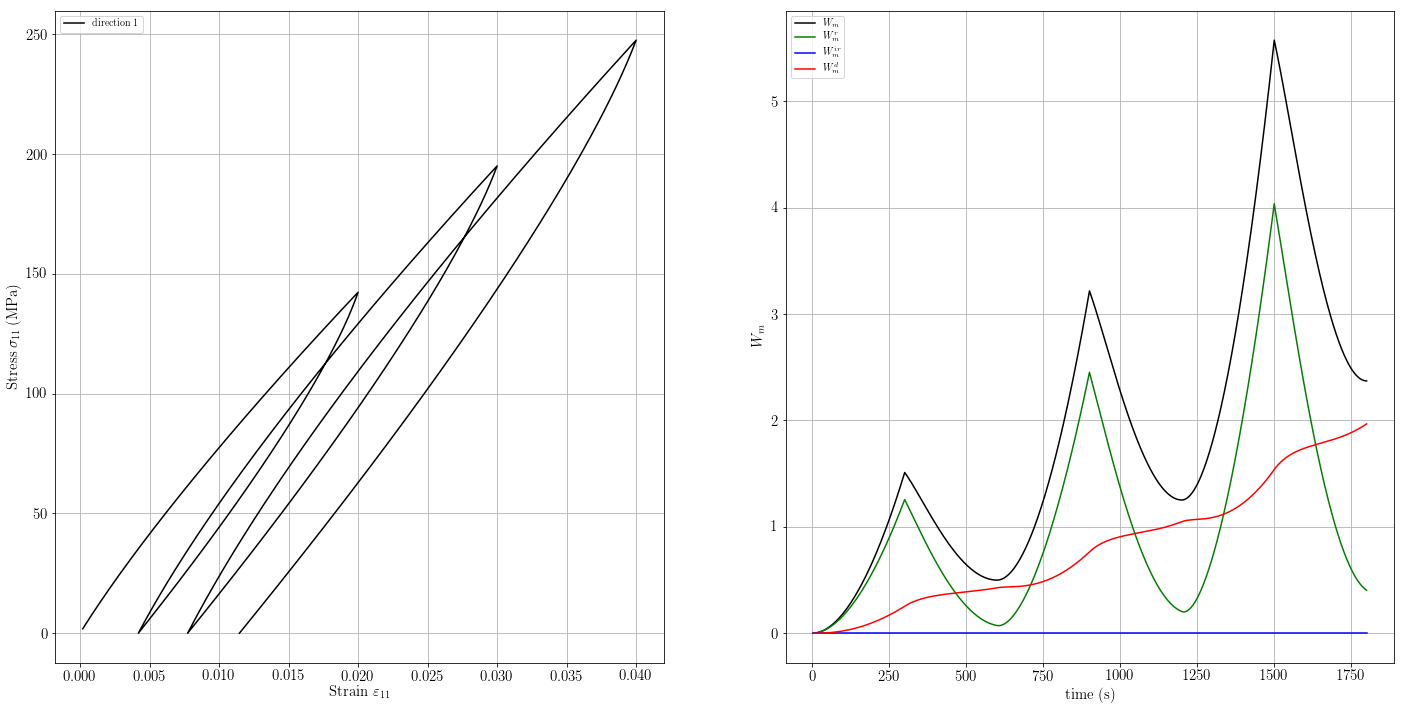

In [17]:
#prepare the load
fig = plt.figure()
outputfile_global = 'results_PRONY_global-0.txt'
pylab.rcParams['figure.figsize'] = (24.0, 12.0) #configure the figure output size
path = dir + '/results/'
P_global = path + outputfile_global

#Get the data
e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(P_global, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
time, T, Q, r = np.loadtxt(P_global, usecols=(4,5,6,7), unpack=True)
Wm, Wm_r, Wm_ir, Wm_d = np.loadtxt(P_global, usecols=(20,21,22,23), unpack=True)

#Plot the results
ax = fig.add_subplot(1, 2, 1)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Strain $\varepsilon_{11}$', size = 15)
plt.ylabel(r'Stress $\sigma_{11}$\,(MPa)', size = 15)
plt.plot(e11,s11, c='black', label='direction 1')
plt.legend(loc=2)

ax = fig.add_subplot(1, 2, 2)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (s)', size = 15)
plt.ylabel(r'$W_m$',size = 15)
plt.plot(time,Wm, c='black', label=r'$W_m$')
plt.plot(time,Wm_r, c='green', label=r'$W_m^r$')
plt.plot(time,Wm_ir, c='blue', label=r'$W_m^{ir}$')
plt.plot(time,Wm_d, c='red', label=r'$W_m^d$')
plt.legend(loc=2)

plt.show()

## Test now the increments 

In [15]:
#Run the simulations - 1 increment
pathfile = 'path_1.txt'
outputfile = 'results_PRONK_1.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, solver_type, path_data, path_results, pathfile, outputfile)
outputfile_global_1 = 'results_PRONK_1_global-0.txt'

#Run the simulations - 10 increments
pathfile = 'path_10.txt'
outputfile = 'results_PRONK_10.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, solver_type, path_data, path_results, pathfile, outputfile)
outputfile_global_10 = 'results_PRONK_10_global-0.txt'

#Run the simulations - 100 increments
pathfile = 'path_100.txt'
outputfile = 'results_PRONK_100.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, solver_type, path_data, path_results, pathfile, outputfile)
outputfile_global_100 = 'results_PRONK_100_global-0.txt'

#Run the simulations - 1000 increments
pathfile = 'path_1000.txt'
outputfile = 'results_PRONK_1000.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, solver_type, path_data, path_results, pathfile, outputfile)
outputfile_global_1000 = 'results_PRONK_1000_global-0.txt'

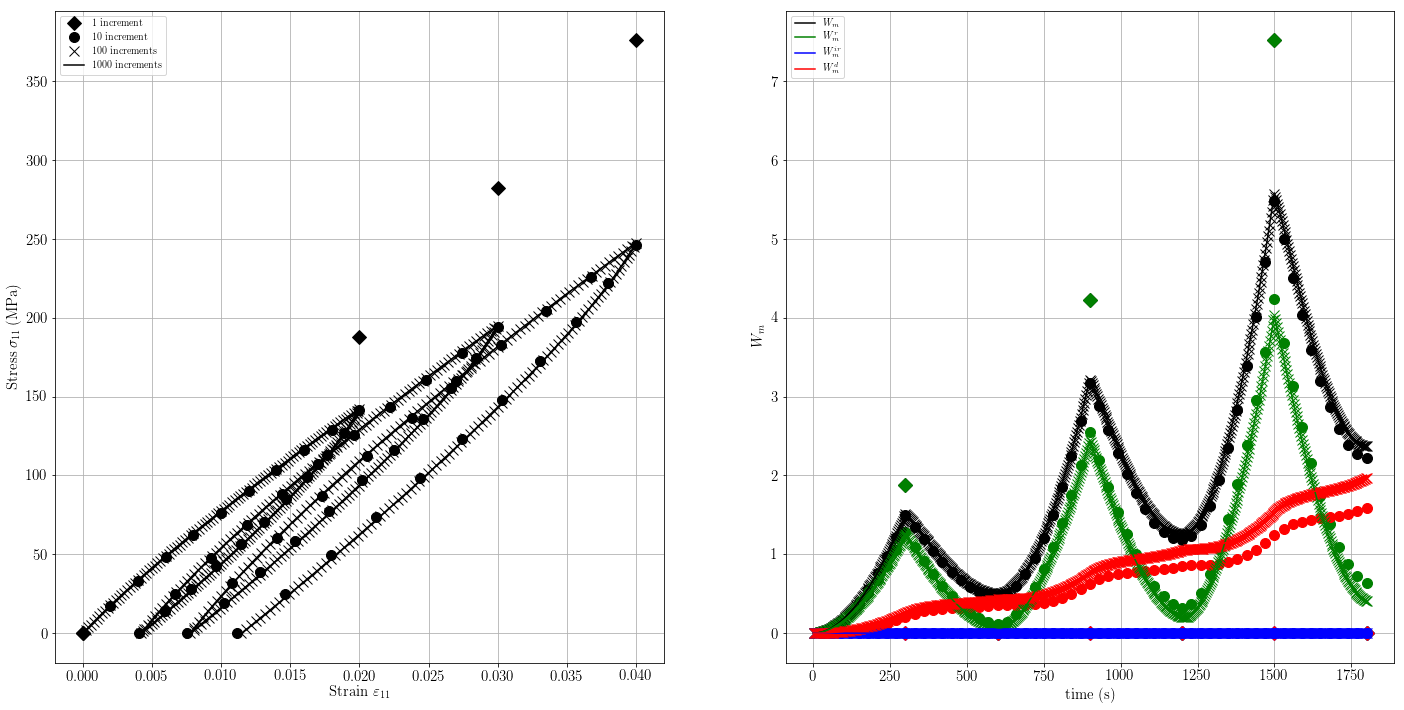

In [16]:
pylab.rcParams['figure.figsize'] = (24.0, 12.0) #configure the figure output size
path = dir + '/results/'
P_global_1 = path + outputfile_global_1
P_global_10 = path + outputfile_global_10
P_global_100 = path + outputfile_global_100
P_global_1000 = path + outputfile_global_1000

#Get the data
e11_1, e22_1, e33_1, e12_1, e13_1, e23_1, s11_1, s22_1, s33_1, s12_1, s13_1, s23_1 = np.loadtxt(P_global_1, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
time_1, T_1, Q_1, r_1 = np.loadtxt(P_global_1, usecols=(4,5,6,7), unpack=True)
Wm_1, Wm_r_1, Wm_ir_1, Wm_d_1 = np.loadtxt(P_global_1, usecols=(20,21,22,23), unpack=True)

e11_10, e22_10, e33_10, e12_10, e13_10, e23_10, s11_10, s22_10, s33_10, s12_10, s13_10, s23_10 = np.loadtxt(P_global_10, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
time_10, T_10, Q_10, r_10 = np.loadtxt(P_global_10, usecols=(4,5,6,7), unpack=True)
Wm_10, Wm_r_10, Wm_ir_10, Wm_d_10 = np.loadtxt(P_global_10, usecols=(20,21,22,23), unpack=True)

e11_100, e22_100, e33_100, e12_100, e13_100, e23_100, s11_100, s22_100, s33_100, s12_100, s13_100, s23_100 = np.loadtxt(P_global_100, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
time_100, T_100, Q_100, r_100 = np.loadtxt(P_global_100, usecols=(4,5,6,7), unpack=True)
Wm_100, Wm_r_100, Wm_ir_100, Wm_d_100 = np.loadtxt(P_global_100, usecols=(20,21,22,23), unpack=True)

e11_1000, e22_1000, e33_1000, e12_1000, e13_1000, e23_1000, s11_1000, s22_1000, s33_1000, s12_1000, s13_1000, s23_1000 = np.loadtxt(P_global_1000, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
time_1000, T_1000, Q_1000, r_1000 = np.loadtxt(P_global_1000, usecols=(4,5,6,7), unpack=True)
Wm_1000, Wm_r_1000, Wm_ir_1000, Wm_d_1000 = np.loadtxt(P_global_1000, usecols=(20,21,22,23), unpack=True)

fig = plt.figure()
pylab.rcParams['figure.figsize'] = (24.0, 12.0) #configure the figure output size

#Plot the results
ax = fig.add_subplot(1, 2, 1)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Strain $\varepsilon_{11}$', size = 15)
plt.ylabel(r'Stress $\sigma_{11}$\,(MPa)', size = 15)
plt.plot(e11_1,s11_1, linestyle='None', marker='D', color='black', markersize=10, label='1 increment')
plt.plot(e11_10,s11_10, linestyle='None', marker='o', color='black', markersize=10, label='10 increment')
plt.plot(e11_100,s11_100, linestyle='None', marker='x', color='black', markersize=10, label='100 increments')
plt.plot(e11_1000,s11_1000, c='black', label='1000 increments')
plt.legend(loc=2)

ax = fig.add_subplot(1, 2, 2)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (s)', size = 15)
plt.ylabel(r'$W_m$',size = 15)
#1 increment
plt.plot(time_1,Wm_1, linestyle='None', marker='D', color='black', markersize=10)#, label=r'$W_m$')
plt.plot(time_1,Wm_r_1, linestyle='None', marker='D', color='green', markersize=10)#, label=r'$W_m^r$')
plt.plot(time_1,Wm_ir_1, linestyle='None', marker='D', color='blue', markersize=10)#, label=r'$W_m^{ir}$')
plt.plot(time_1,Wm_d_1, linestyle='None', marker='D', color='red', markersize=10)#, label=r'$W_m^d$')
#10 increment
plt.plot(time_10,Wm_10, linestyle='None', marker='o', color='black', markersize=10)#, label=r'$W_m$')
plt.plot(time_10,Wm_r_10, linestyle='None', marker='o', color='green', markersize=10)#, label=r'$W_m^r$')
plt.plot(time_10,Wm_ir_10, linestyle='None', marker='o', color='blue', markersize=10)#, label=r'$W_m^{ir}$')
plt.plot(time_10,Wm_d_10, linestyle='None', marker='o', color='red', markersize=10)#, label=r'$W_m^d$')
#100 increments
plt.plot(time_100,Wm_100, linestyle='None', marker='x', color='black', markersize=10)#, label=r'$W_m$')
plt.plot(time_100,Wm_r_100, linestyle='None', marker='x', color='green', markersize=10)#, label=r'$W_m^r$')
plt.plot(time_100,Wm_ir_100, linestyle='None', marker='x', color='blue', markersize=10)#, label=r'$W_m^{ir}$')
plt.plot(time_100,Wm_d_100, linestyle='None', marker='x', color='red', markersize=10)#, label=r'$W_m^d$')
#1000 increments
plt.plot(time_1000,Wm_1000, c='black', label=r'$W_m$')
plt.plot(time_1000,Wm_r_1000, c='green', label=r'$W_m^r$')
plt.plot(time_1000,Wm_ir_1000, c='blue', label=r'$W_m^{ir}$')
plt.plot(time_1000,Wm_d_1000, c='red', label=r'$W_m^d$')
##
plt.legend(loc=2)

plt.show()

